In [1]:
import os
import tensorflow as tf 
import keras.backend.tensorflow_backend as KTF

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session = tf.compat.v1.Session(config=config)

KTF.set_session(session)

Using TensorFlow backend.


In [2]:

from keras.datasets import mnist

from keras.utils import np_utils

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout

import matplotlib.pyplot as plt

In [3]:

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
print("num pixels : ", num_pixels)
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)

num pixels :  784
X_train shape :  (60000, 784)
X_test shape :  (10000, 784)


In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print('One-hot labels:')
print(y_train[:10])


One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:

# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [16]:

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 8s - loss: 0.1811 - accuracy: 0.9459 - val_loss: 0.1055 - val_accuracy: 0.9663
Epoch 2/10
60000/60000 - 7s - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0.0759 - val_accuracy: 0.9755
Epoch 3/10
60000/60000 - 8s - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 4/10
60000/60000 - 8s - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.1002 - val_accuracy: 0.9711
Epoch 5/10
60000/60000 - 8s - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0684 - val_accuracy: 0.9804
Epoch 6/10
60000/60000 - 8s - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0766 - val_accuracy: 0.9802
Epoch 7/10
60000/60000 - 8s - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0774 - val_accuracy: 0.9817
Epoch 8/10
60000/60000 - 8s - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0969 - val_accuracy: 0.9810
Epoch 9/10
60000/60000 - 8s - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0996 - val_accuracy: 0.9808
Epoch 10/10
60

In [13]:
img = X_test[120]
test_img = img.reshape((1,784))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  5


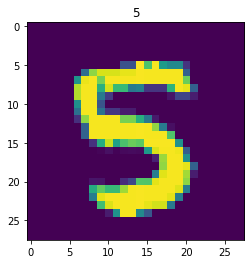

In [14]:
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()